In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diplomka/results_imageToFile_scan1_filtered', sep=',',header = 0)
df

,correct,incorrect,filteredValue,surroundings,line,filter
0,7042,10268,0,3,True,none
1,6980,3062,300,3,True,none
2,9094,8874,0,3,True,mean
3,8698,1004,300,3,True,mean
4,11890,15644,0,3,True,median
5,11355,3926,300,3,True,median
6,9086,8908,0,3,True,gauss5
7,8658,998,300,3,True,gauss5
8,8307,52438,0,3,False,none
9,8220,14103,300,3,False,none


In [ ]:
df['precision'] = df['correct']/(df['incorrect'] + df['correct'])

In [ ]:
df['bnxCount'] = 20974
df.loc[df['filteredValue'] == 300, 'bnxCount'] = 16526

In [ ]:
df['sensitivity'] = df['correct'] / df['bnxCount']

In [ ]:
df

,correct,incorrect,filteredValue,surroundings,line,filter,precision,bnxCount,sensitivity
0,7042,10268,0,3,True,none,0.406817,20974,0.335749
1,6980,3062,300,3,True,none,0.695081,16526,0.422365
2,9094,8874,0,3,True,mean,0.506122,20974,0.433584
3,8698,1004,300,3,True,mean,0.896516,16526,0.526322
4,11890,15644,0,3,True,median,0.431830,20974,0.566892
5,11355,3926,300,3,True,median,0.743080,16526,0.687099
6,9086,8908,0,3,True,gauss5,0.504946,20974,0.433203
7,8658,998,300,3,True,gauss5,0.896645,16526,0.523902
8,8307,52438,0,3,False,none,0.136752,20974,0.396062
9,8220,14103,300,3,False,none,0.368230,16526,0.497398


In [ ]:
SENSITIVITY_LIMIT = 1
PRECISION_LIMIT = 1

#line is used


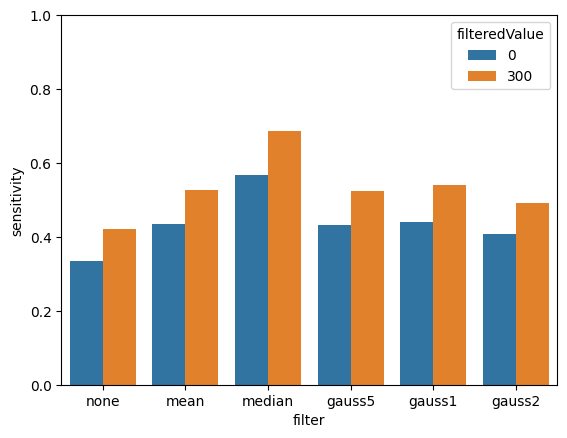

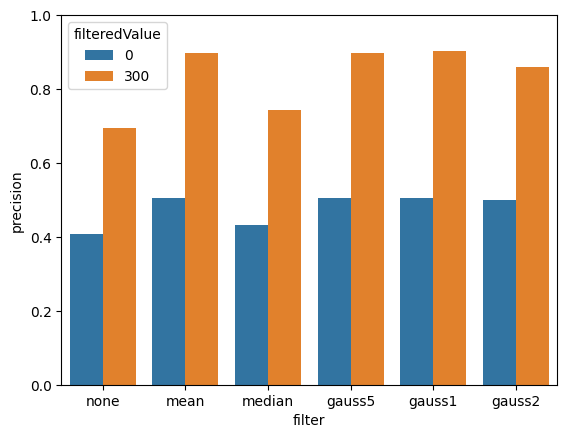

In [ ]:
plt.ylim(0, SENSITIVITY_LIMIT)
sns.barplot(data=df.loc[df['line'] == True], x='filter', y='sensitivity', hue='filteredValue')
plt.show()
plt.ylim(0, PRECISION_LIMIT)
sns.barplot(data=df.loc[df['line'] == True], x='filter', y='precision', hue='filteredValue')
plt.show()

#maxima is used

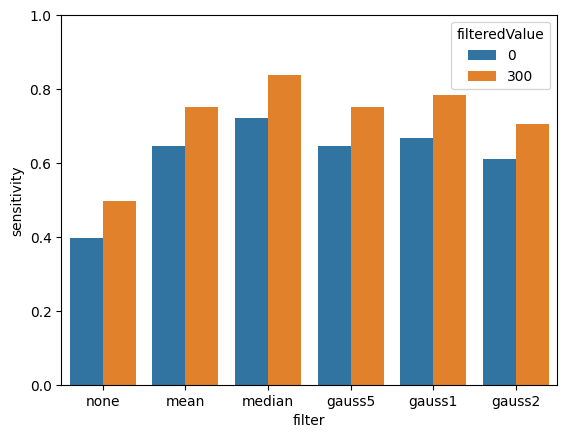

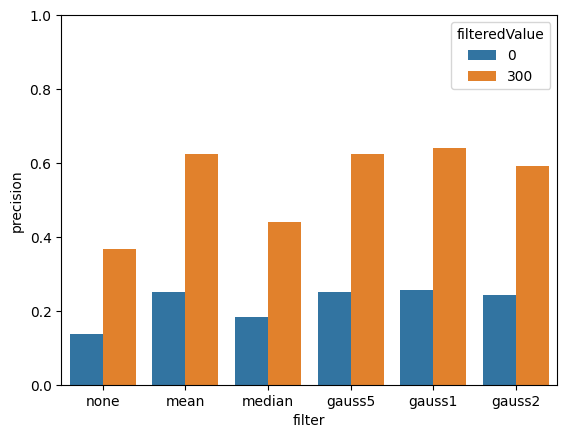

In [ ]:

sns.barplot(data=df.loc[df['line'] == False], x='filter', y='sensitivity', hue='filteredValue')
plt.ylim(0, SENSITIVITY_LIMIT)
plt.show()

sns.barplot(data=df.loc[df['line'] == False], x='filter', y='precision', hue='filteredValue')
plt.ylim(0, PRECISION_LIMIT)
plt.show()

reference obsahuje falesne pozitivni znacky (https://academic.oup.com/bioinformatics/article/37/20/3391/6275255?login=false), muze se porovnat vysledek i s tim a diskutovat co je lepsi zvolit (min falesnych, vic z bnx)

normalizace je odečtění hodnoty pozadí

diferencialni evoluce na gauss kernel

sigma ze sireni svetla

popsat strukturu projektu - analyza/prevod

In [ ]:
df['f1'] = 2*(df['sensitivity'] * df['precision'] / (df['sensitivity'] + df['precision']))

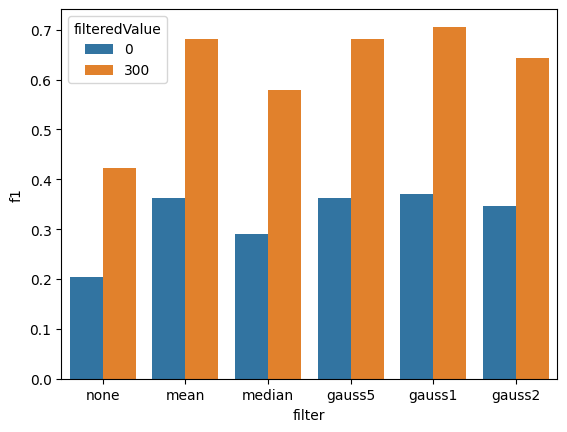

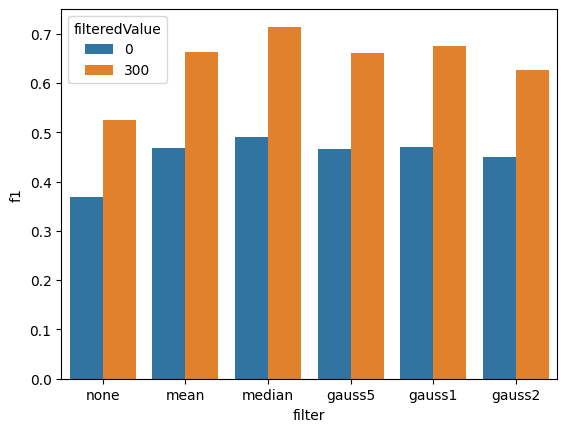

In [ ]:
sns.barplot(data=df.loc[df['line'] == False], x='filter', y='f1', hue='filteredValue')
plt.show()
sns.barplot(data=df.loc[df['line'] == True], x='filter', y='f1', hue='filteredValue')
plt.show()

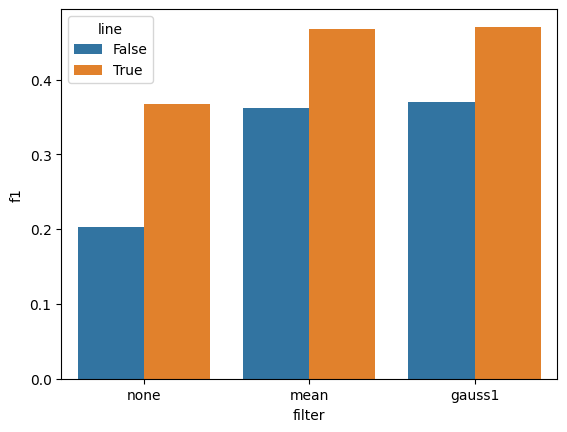

In [ ]:
sns.barplot(data=df.loc[((df['filter'] == 'none') | (df['filter'] == 'mean') | (df['filter'] == 'gauss1')) & (df['filteredValue'] == 0)], x='filter', y='f1', hue='line')
plt.show()

In [ ]:
df

,correct,incorrect,filteredValue,surroundings,line,filter,precision,bnxCount,sensitivity,f1
0,7042,10268,0,3,True,none,0.406817,20974,0.335749,0.367882
1,6980,3062,300,3,True,none,0.695081,16526,0.422365,0.525444
2,9094,8874,0,3,True,mean,0.506122,20974,0.433584,0.467054
3,8698,1004,300,3,True,mean,0.896516,16526,0.526322,0.663261
4,11890,15644,0,3,True,median,0.431830,20974,0.566892,0.490228
5,11355,3926,300,3,True,median,0.743080,16526,0.687099,0.713994
6,9086,8908,0,3,True,gauss5,0.504946,20974,0.433203,0.466331
7,8658,998,300,3,True,gauss5,0.896645,16526,0.523902,0.661370
8,8307,52438,0,3,False,none,0.136752,20974,0.396062,0.203306
9,8220,14103,300,3,False,none,0.368230,16526,0.497398,0.423177
